In [ ]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/rramosp/ai4eng.v1/main/content/init.py
import init; init.init(force_download=False); init.get_weblink()

replicating local resources


logging in as yuliana.corralesc@udea.edu.co ... please wait


error: invalid token, login again. Invalid padding... (set session.debug=True for tracebacks)

# 01.01 - PROYECTO KAGGLE

download data directly from Kaggle
create a file kaggle.json with your authentication token (in kaggle → click user icon on top-right → settings → API create new token)
upload it to this notebook workspace
run the following cell

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '.'
!chmod 600 ./kaggle.json
!kaggle competitions download -c udea-ai4eng-20242

 50% 10.0M/20.1M [00:00<00:00, 93.3MB/s]
100% 20.1M/20.1M [00:00<00:00, 111MB/s] 


## unzip and inspect data

In [ ]:
!unzip udea*.zip > /dev/null

In [ ]:
!wc *.csv

   296787    296787   4716673 submission_example.csv
   296787   4565553  50135751 test.csv
   692501  10666231 118025055 train.csv
  1286075  15528571 172877479 total


load train.csv data with pandas

In [ ]:
import pandas as pd
import numpy as np

z = pd.read_csv("train.csv")
print ("shape of loaded dataframe", z.shape)


shape of loaded dataframe (692500, 12)


El archivo CSV llamado dataframe contiene 692,500 filas, es decir, tiene 692,500 registros u observaciones.
12 columnas: Cada registro tiene 12 atributos o variables.
Esto indica que el archivo train.csv contiene una gran cantidad de datos, con 692,500 ejemplos, cada uno descrito por 12 variables diferentes.

In [ ]:
z.head()

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO,RENDIMIENTO_GLOBAL
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Postgrado,No,medio-alto
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Técnica o tecnológica incompleta,No,bajo
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,No,bajo
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Secundaria (Bachillerato) completa,No,alto
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Primaria completa,No,medio-bajo


Acá vemos las primeras 5 filas del dataframe z, es decir, una muestra de los datos cargados para inspeccionarlos, con sus respectivas columnas.

In [ ]:
# Contar estudiantes por nivel de rendimiento global
rendimiento_estudiantes = z['RENDIMIENTO_GLOBAL'].value_counts()

# Mostrar los resultados
print(rendimiento_estudiantes)

RENDIMIENTO_GLOBAL
alto          175619
bajo          172987
medio-bajo    172275
medio-alto    171619
Name: count, dtype: int64


# CONSULTAR DATOS FALTANTES

## Necesitamos identificar cuáles son los datos faltantes con el fin de decidir qué columnas podemos eliminar o imputar



In [ ]:
z.isnull().sum()


,0
ID,0
PERIODO,0
ESTU_PRGM_ACADEMICO,0
ESTU_PRGM_DEPARTAMENTO,0
ESTU_VALORMATRICULAUNIVERSIDAD,6287
ESTU_HORASSEMANATRABAJA,30857
FAMI_ESTRATOVIVIENDA,32137
FAMI_TIENEINTERNET,26629
FAMI_EDUCACIONPADRE,23178
FAMI_EDUCACIONMADRE,23664


# INSPECCIONAR LA VARIABLE OBJETIVO


Utilizaremos Seaborn para crear un gráfico de distribución (displot) de la columna RENDIMIENTO_GLOBAL, con el fin de generar un gráfico de barras para visualizar la distribución de la variable categórica 'RENDIMIENTO_GLOBAL'.

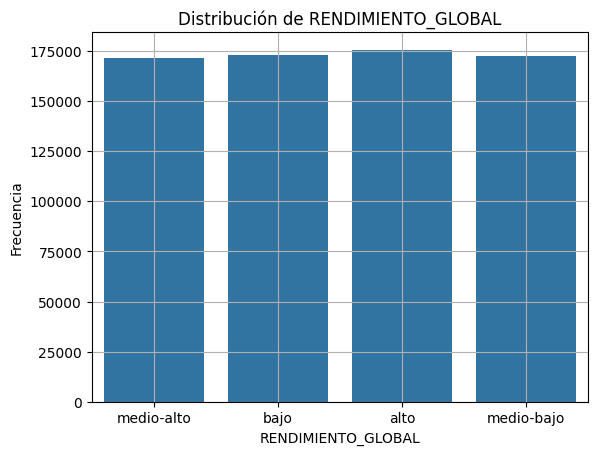

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Creamos un gráfico de barras para la variable rendimiento global
sns.countplot(x=z['RENDIMIENTO_GLOBAL'])  # Gráfico de conteo para variables categóricas
plt.title('Distribución de RENDIMIENTO_GLOBAL')
plt.xlabel('RENDIMIENTO_GLOBAL')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()



# DESCUBRIR LOS TIPOS DE DATOS

## Para descubrir los tipos de datos de las columnas del DataFrame y ver qué columnas están presentes, utilizaremos el método dtypes junto con columns para obtener información completa sobre las columnas y sus tipos

In [ ]:
# Mostrar todas las columnas del DataFrame z
print(z.columns)

# Mostrar los tipos de datos de cada columna en el DataFrame z
print("\nTipos de datos de cada columna:")
print(z.dtypes)


Index(['ID', 'PERIODO', 'ESTU_PRGM_ACADEMICO', 'ESTU_PRGM_DEPARTAMENTO',
       'ESTU_VALORMATRICULAUNIVERSIDAD', 'ESTU_HORASSEMANATRABAJA',
       'FAMI_ESTRATOVIVIENDA', 'FAMI_TIENEINTERNET', 'FAMI_EDUCACIONPADRE',
       'FAMI_EDUCACIONMADRE', 'ESTU_PAGOMATRICULAPROPIO',
       'RENDIMIENTO_GLOBAL'],
      dtype='object')

Tipos de datos de cada columna:
ID                                 int64
PERIODO                            int64
ESTU_PRGM_ACADEMICO               object
ESTU_PRGM_DEPARTAMENTO            object
ESTU_VALORMATRICULAUNIVERSIDAD    object
ESTU_HORASSEMANATRABAJA           object
FAMI_ESTRATOVIVIENDA              object
FAMI_TIENEINTERNET                object
FAMI_EDUCACIONPADRE               object
FAMI_EDUCACIONMADRE               object
ESTU_PAGOMATRICULAPROPIO          object
RENDIMIENTO_GLOBAL                object
dtype: object


## Exploramos visualmente la relación entre el rendimiento académico de los estudiantes y otros factores como el valor de la matrícula universitaria, las horas trabajadas semanalmente y el estrato socioeconómico de la vivienda. Este tipo de análisis puede ayudar a identificar patrones, correlaciones, etc.

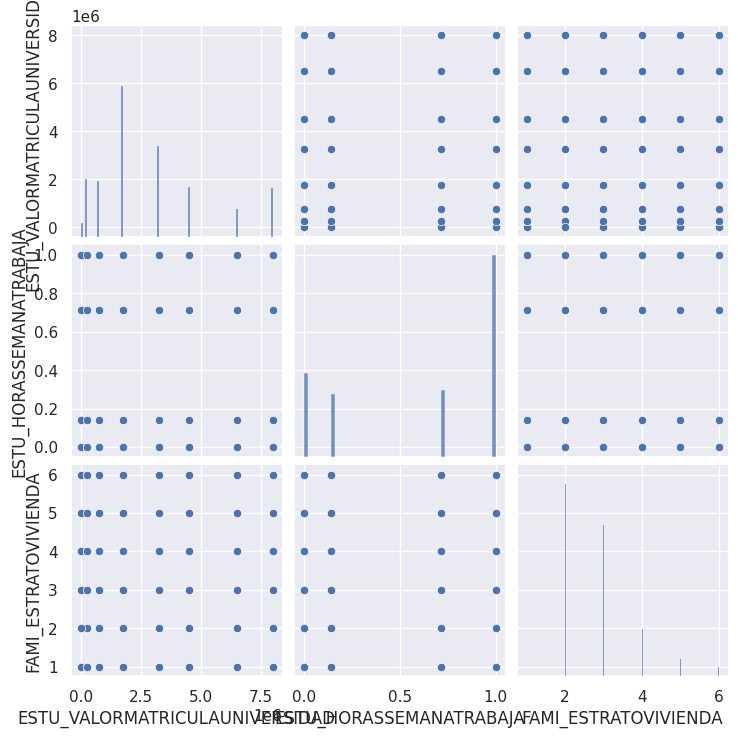

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Seleccionar las columnas numéricas junto con la variable de interés 'RENDIMIENTO_GLOBAL'
cols = ['ESTU_VALORMATRICULAUNIVERSIDAD', 'ESTU_HORASSEMANATRABAJA', 'FAMI_ESTRATOVIVIENDA', 'RENDIMIENTO_GLOBAL']

# Configurar el estilo de Seaborn
sns.set()

# Crear el pairplot para las columnas seleccionadas
sns.pairplot(z[cols])

# Mostrar el gráfico
plt.show()




# INSPECCIÓN VARIABLES CATEGÓRICAS

In [ ]:
# Inspeccionar las columnas categóricas (no numéricas) en el DataFrame z
ccols = [i for i in z.columns if not i in z._get_numeric_data()]
print("Columnas categóricas:", ccols)



Columnas categóricas: ['ESTU_PRGM_ACADEMICO', 'ESTU_PRGM_DEPARTAMENTO', 'FAMI_TIENEINTERNET', 'FAMI_EDUCACIONPADRE', 'FAMI_EDUCACIONMADRE', 'ESTU_PAGOMATRICULAPROPIO', 'RENDIMIENTO_GLOBAL']


<ipython-input-43-f2925cee31b5>:13: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


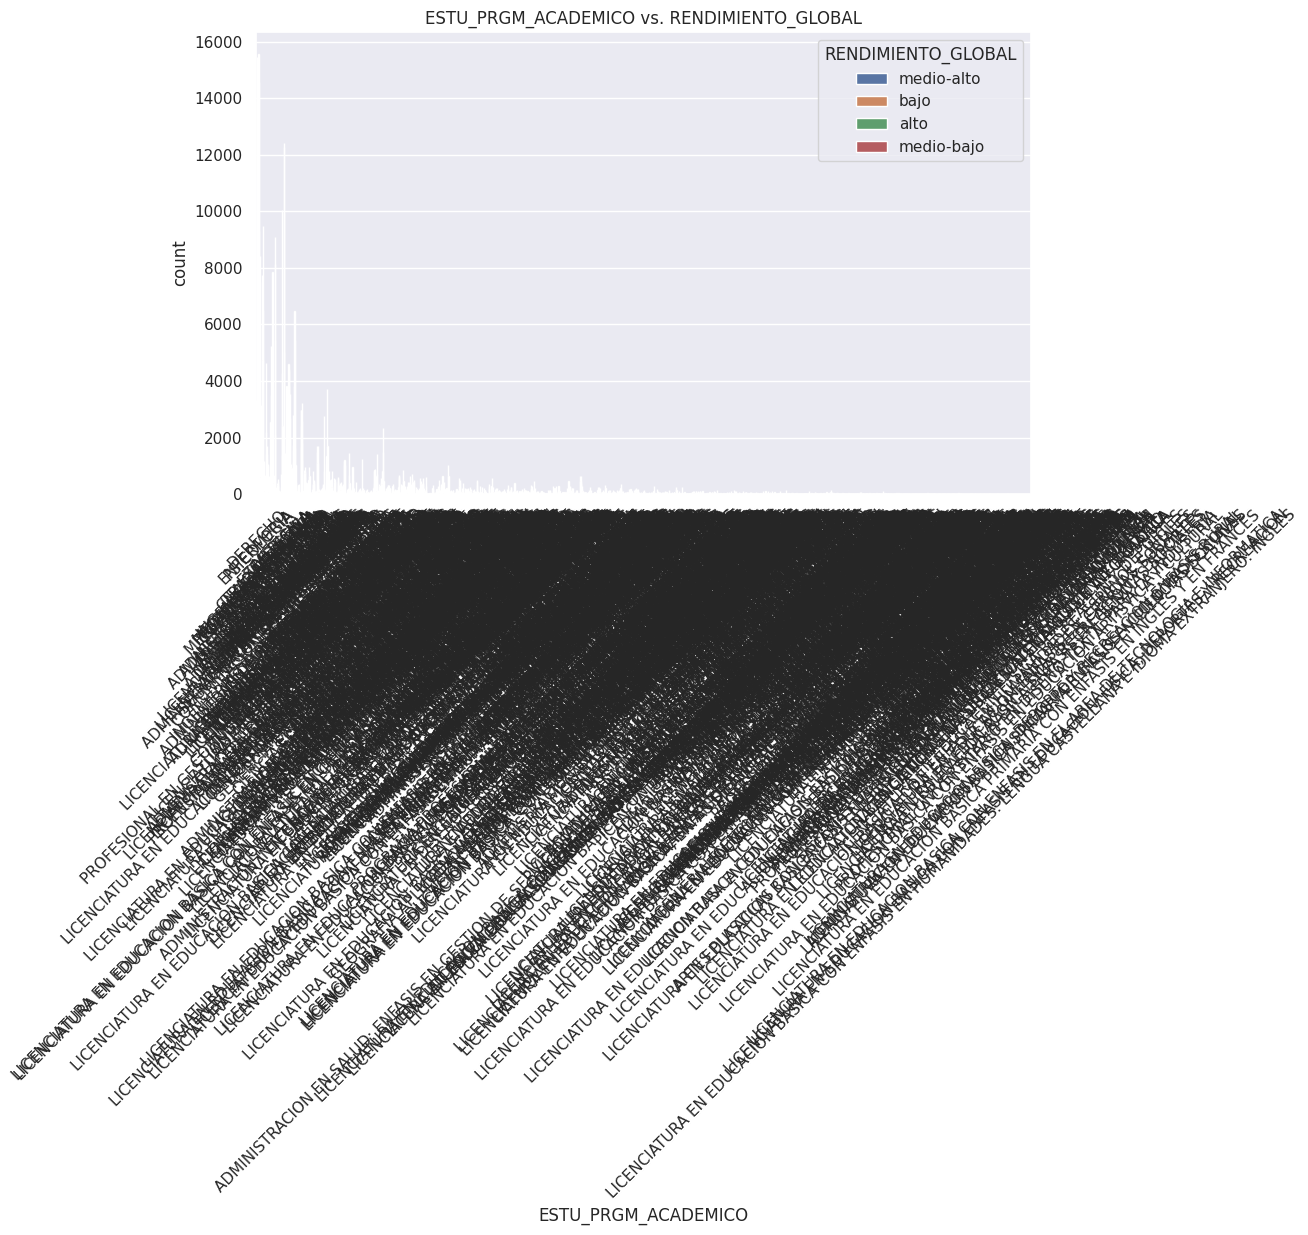

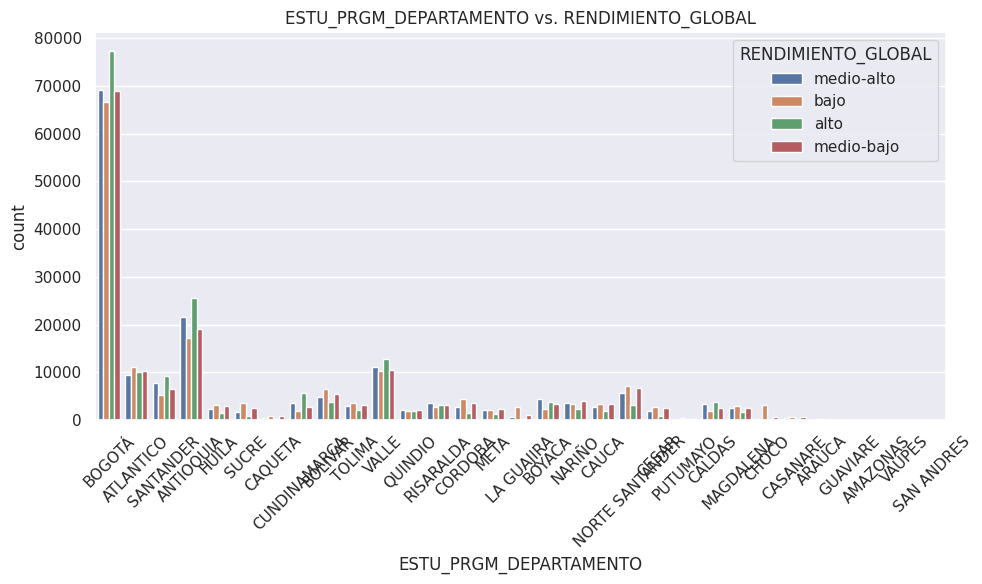

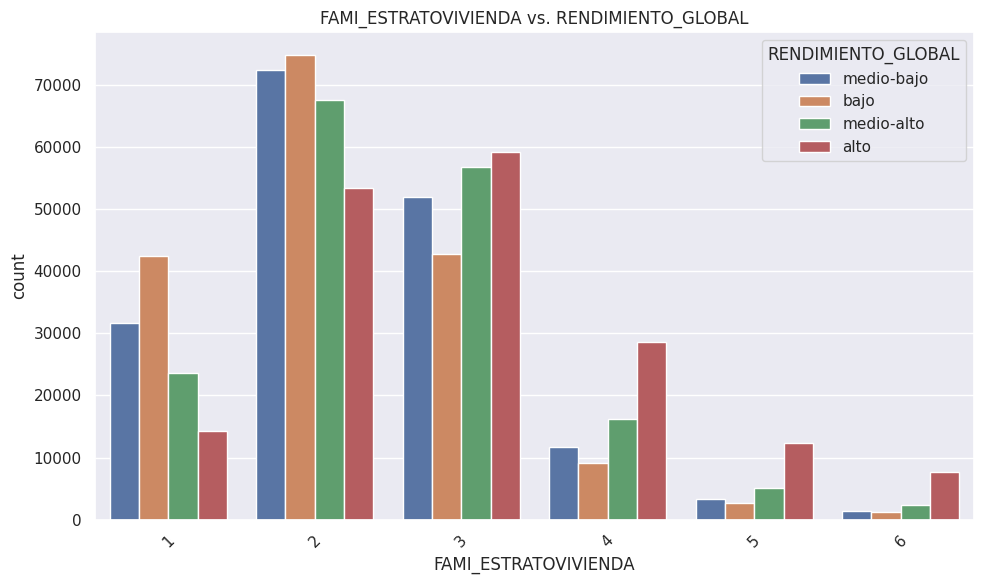

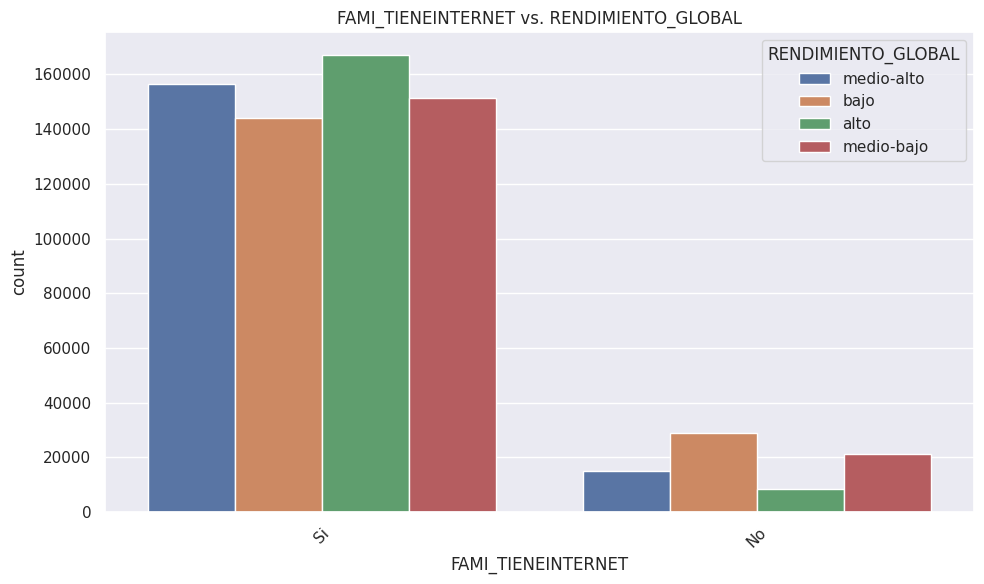

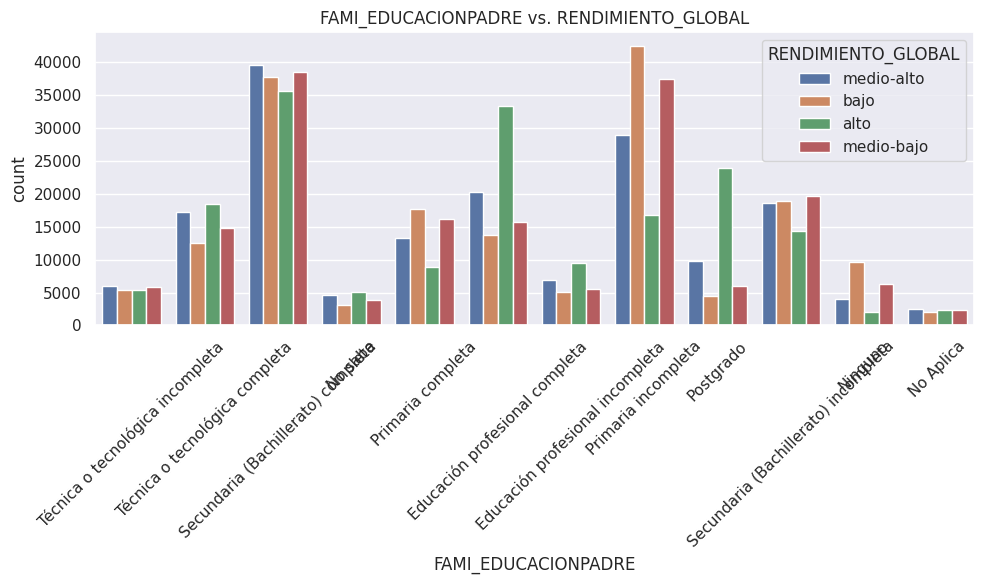

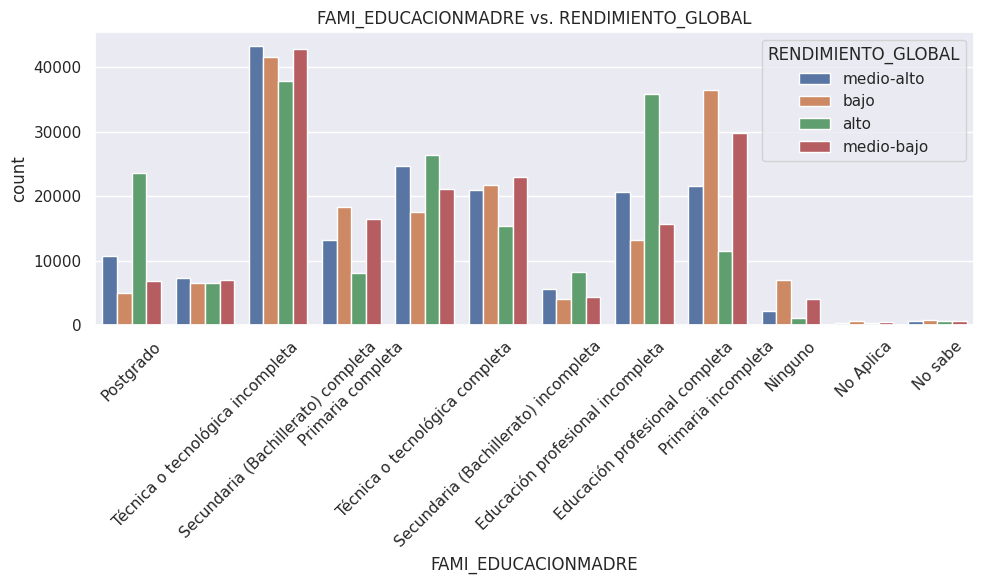

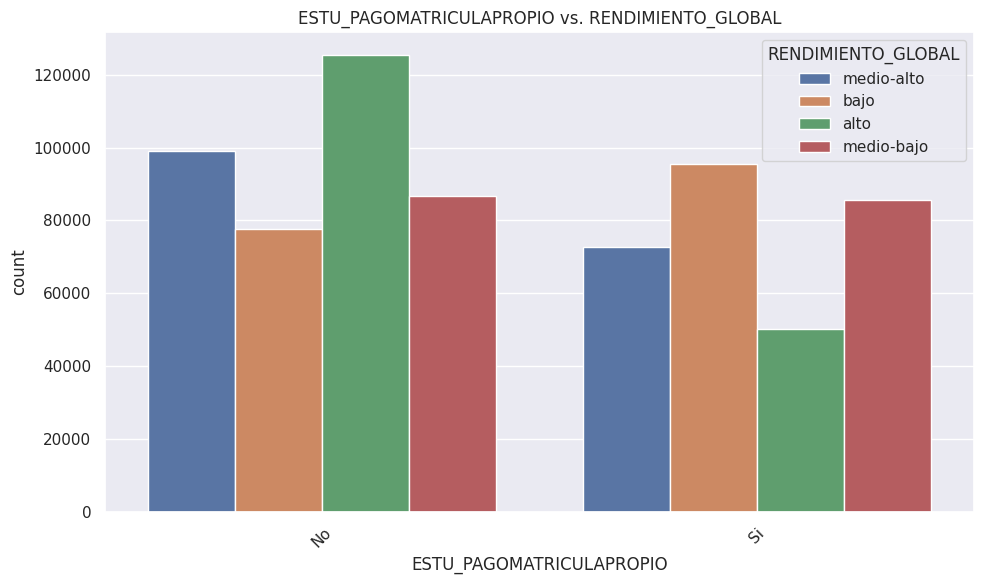

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Listado de columnas categóricas
categorical_cols = ['ESTU_PRGM_ACADEMICO', 'ESTU_PRGM_DEPARTAMENTO', 'FAMI_ESTRATOVIVIENDA', 'FAMI_TIENEINTERNET', 'FAMI_EDUCACIONPADRE', 'FAMI_EDUCACIONMADRE', 'ESTU_PAGOMATRICULAPROPIO']

# Crear gráficos comparando cada columna categórica con RENDIMIENTO_GLOBAL
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=z, x=col, hue='RENDIMIENTO_GLOBAL')
    plt.title(f'{col} vs. RENDIMIENTO_GLOBAL')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


# Modelo Random Forest
Acá se implementó el modelo de clasificación Random Forest para predecir categorías en un conjunto de datos tabulares. Comienza cargando los datos y reemplazando valores faltantes con 'DESCONOCIDO'. Luego, las variables categóricas se codifican en valores numéricos usando LabelEncoder, asegurando que el modelo pueda procesarlas. Posteriormente, los datos se dividen en conjuntos de entrenamiento y prueba en una proporción 70/30, manteniendo las proporciones de las clases para una evaluación justa. Con el conjunto de entrenamiento, se entrena el modelo Random Forest, que crea varios árboles de decisión y combina sus predicciones para obtener una mayor precisión.

Después del entrenamiento, el modelo realiza predicciones en el conjunto de prueba. Para evaluar su rendimiento, se generan métricas como precisión, recall y F1-score mediante un reporte de clasificación. Adicionalmente, se crea una matriz de confusión que muestra los aciertos y errores del modelo, lo que permite identificar patrones de fallo. Finalmente, esta matriz se visualiza como un gráfico para facilitar su interpretación.



Datos cargados exitosamente.


<ipython-input-26-194152b9727c>:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].median(), inplace=True)
<ipython-input-26-194152b9727c>:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

No hay columnas numéricas en las características seleccionadas para normalizar.

F1-Score promedio en validación cruzada: 0.4084

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.56      0.57      0.56     52686
           1       0.44      0.52      0.48     51896
           2       0.32      0.29      0.30     51486
           3       0.31      0.28      0.30     51682

    accuracy                           0.42    207750
   macro avg       0.41      0.41      0.41    207750
weighted avg       0.41      0.42      0.41    207750

F1-Score (weighted): 0.4113


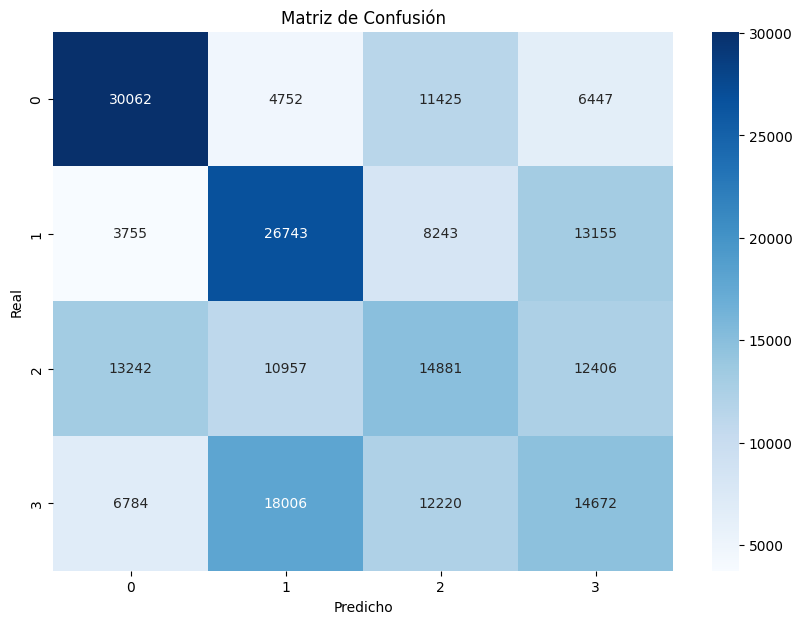

In [ ]:
# Importar librerías necesarias
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Cargar los datos
df = pd.read_csv('train.csv')
print("Datos cargados exitosamente.")

# 2. Manejo avanzado de valores faltantes
num_columns = df.select_dtypes(include=['int64', 'float64']).columns
cat_columns = df.select_dtypes(include='object').columns

for column in num_columns:
    df[column].fillna(df[column].median(), inplace=True)
for column in cat_columns:
    df[column].fillna(df[column].mode()[0], inplace=True)

# 3. Codificar variables categóricas
label_encoders = {}
for column in cat_columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Codificar la variable objetivo
target_encoder = LabelEncoder()
df['RENDIMIENTO_GLOBAL'] = target_encoder.fit_transform(df['RENDIMIENTO_GLOBAL'])

# 4. Seleccionar características relevantes
selected_features = [
    'ESTU_PRGM_DEPARTAMENTO', 'ESTU_VALORMATRICULAUNIVERSIDAD',
    'ESTU_PRGM_ACADEMICO', 'ESTU_HORASSEMANATRABAJA'
]
X = df[selected_features]
y = df['RENDIMIENTO_GLOBAL']

# Normalizar solo las columnas numéricas relevantes
scaler = StandardScaler()
num_columns_in_X = [col for col in num_columns if col in selected_features]

if num_columns_in_X:
    X[num_columns_in_X] = scaler.fit_transform(X[num_columns_in_X])
else:
    print("No hay columnas numéricas en las características seleccionadas para normalizar.")

# 5. Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# 6. Entrenar el modelo Random Forest con parámetros optimizados
rf_model = RandomForestClassifier(
    random_state=42,
    class_weight='balanced',
    n_estimators=300,         # Aumentar el número de árboles
    max_depth=20,             # Probar mayor profundidad
    min_samples_split=4,      # Reducir para considerar más splits
    max_features='sqrt'       # Elegir un subconjunto aleatorio de características
)
rf_model.fit(X_train, y_train)

# Validación cruzada para medir estabilidad
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='f1_weighted')
print(f"\nF1-Score promedio en validación cruzada: {cv_scores.mean():.4f}")

# 7. Hacer predicciones
y_pred = rf_model.predict(X_test)

# 8. Evaluar el modelo
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))

# Calcular F1-Score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1-Score (weighted): {f1:.4f}")

# Matriz de Confusión
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()
